In [8]:
!pip install scikit-learn

In [9]:
#Library untuk load data
import pandas as pd

#Library untuk processing data
import numpy as np

#Library untuk melakukan visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#Library untuk pemodelan data dan evaluasi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

#library membuat slider input
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interactive

In [10]:
!pip install openpyxl

In [11]:
#load data
df = pd.read_excel('DATA RUMAH.xlsx')

#melihat type data dari setiap field
df.info()

#Melihat jumlah data dan field
print("Shape of data : ")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB
Shape of data : 
(1010, 8)


In [12]:
#untuk melihat dan analisa isi data untuk mengambil langkah selanjutnya
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [13]:
#Cek data apakah ada yang duplicate
print("Jumlah data dupliacated : ", df.duplicated().sum(), end="")

#menampilkan jumlah nilai yang hilang untuk setaip kolom
df.isna().sum()

Jumlah data dupliacated :  0

NO            0
NAMA RUMAH    0
HARGA         0
LB            0
LT            0
KT            0
KM            0
GRS           0
dtype: int64

In [14]:
# Cek nama kolom yang ada di DataFrame
print(df.columns)

# Hapus kolom yang tidak diperlukan (pastikan nama kolom sudah benar)
df.drop(['NO', 'NAMA RUMAH'], axis=1, inplace=True, errors='ignore')

# Ganti nama kolom dengan nama yang lebih mudah dipahami
df.rename(columns={
    'LB': 'luas_bangunan',
    'LT': 'luas_tanah',
    'KT': 'kamar_tidur',
    'KM': 'kamar_mandi',
    'GRS': 'garasi',
    'HARGA': 'harga_rumah'
}, inplace=True)

# Tampilkan data setelah kolom yang tidak digunakan dihapus dan nama kolom diganti
df.head()

Index(['NO', 'NAMA RUMAH', 'HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS'], dtype='object')


,harga_rumah,luas_bangunan,luas_tanah,kamar_tidur,kamar_mandi,garasi
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


In [15]:
#melihat ringkasan statistik dari dataframe
df.describe()

,harga_rumah,luas_bangunan,luas_tanah,kamar_tidur,kamar_mandi,garasi
count,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


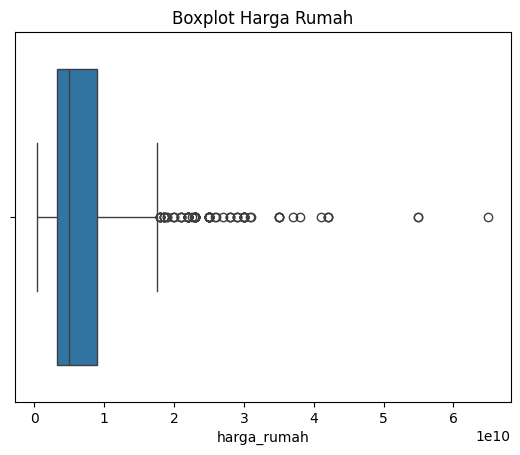

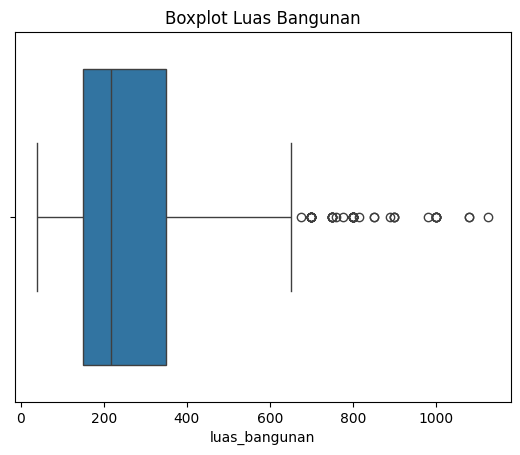

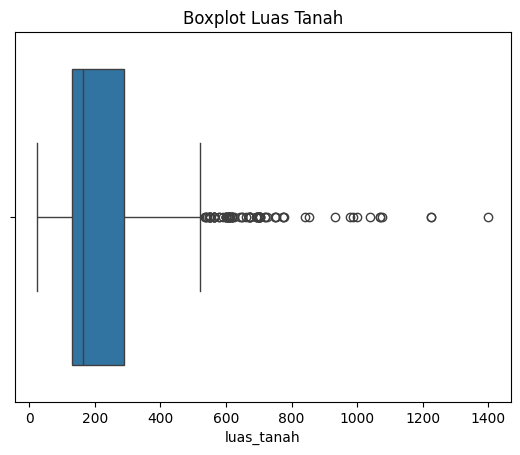

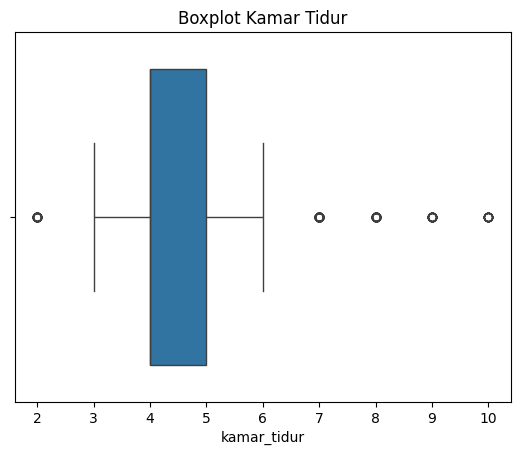

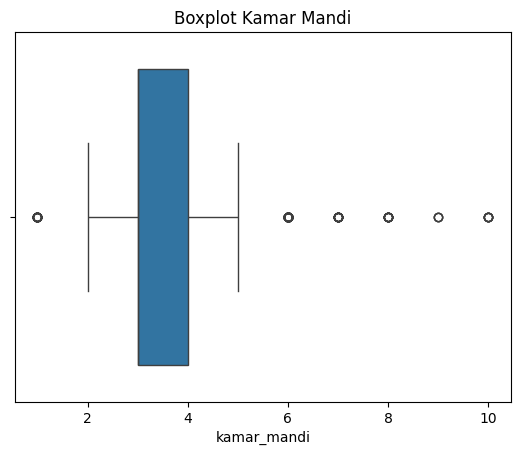

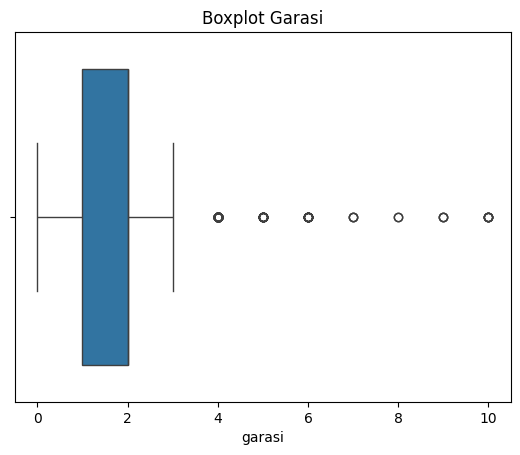

In [16]:
# Visualisasi boxplot untuk kolom HARGA
sns.boxplot(x='harga_rumah', data=df)
plt.title('Boxplot Harga Rumah')
plt.show()

# Visualisasi boxplot untuk kolom Luas Bangunan
sns.boxplot(x='luas_bangunan', data=df)
plt.title('Boxplot Luas Bangunan')
plt.show()

# Visualisasi boxplot untuk kolom Luas Tanah
sns.boxplot(x='luas_tanah', data=df)
plt.title('Boxplot Luas Tanah')
plt.show()

# Visualisasi boxplot untuk kolom Kamar Tidur
sns.boxplot(x='kamar_tidur', data=df)
plt.title('Boxplot Kamar Tidur')
plt.show()

# Visualisasi boxplot untuk kolom Kamar Mandi
sns.boxplot(x='kamar_mandi', data=df)
plt.title('Boxplot Kamar Mandi')
plt.show()

# Visualisasi boxplot untuk kolom Garasi
sns.boxplot(x='garasi', data=df)
plt.title('Boxplot Garasi')
plt.show()

#Tujuannya untuk melihat apakah ada data dari semua field yang jauh lebih tinggi atau lebih rendah
#dari sebagian besar data (outliers), serta rentang harga yang paling umum

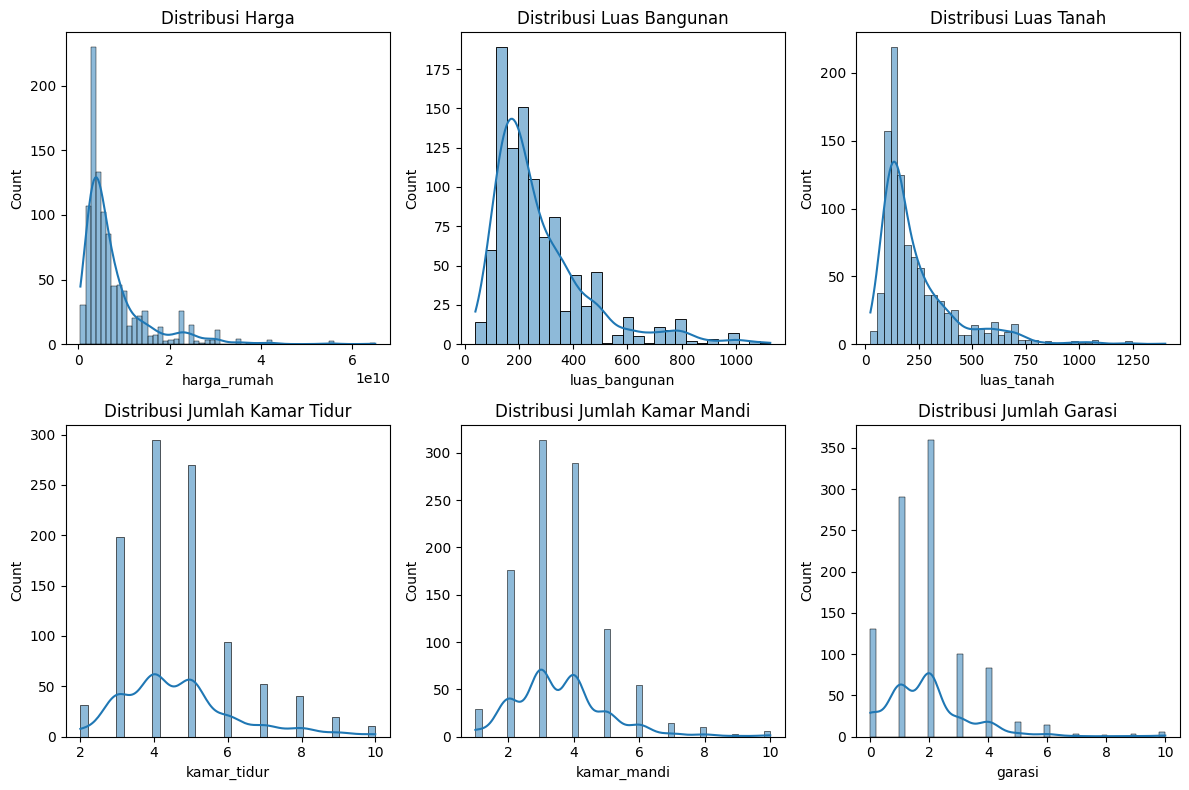

In [17]:
# Untuk melihat jumlah data yang kembar (untuk melihat data paling banyak dan sedikit)
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.histplot(df['harga_rumah'], kde=True)
plt.title('Distribusi Harga')

plt.subplot(2, 3, 2)
sns.histplot(df['luas_bangunan'], kde=True)
plt.title('Distribusi Luas Bangunan')

plt.subplot(2, 3, 3)
sns.histplot(df['luas_tanah'], kde=True)
plt.title('Distribusi Luas Tanah')

plt.subplot(2, 3, 4)
sns.histplot(df['kamar_tidur'], kde=True)
plt.title('Distribusi Jumlah Kamar Tidur')

plt.subplot(2, 3, 5)
sns.histplot(df['kamar_mandi'], kde=True)
plt.title('Distribusi Jumlah Kamar Mandi')

plt.subplot(2, 3, 6)
sns.histplot(df['garasi'], kde=True)
plt.title('Distribusi Jumlah Garasi')

plt.tight_layout()
plt.show()

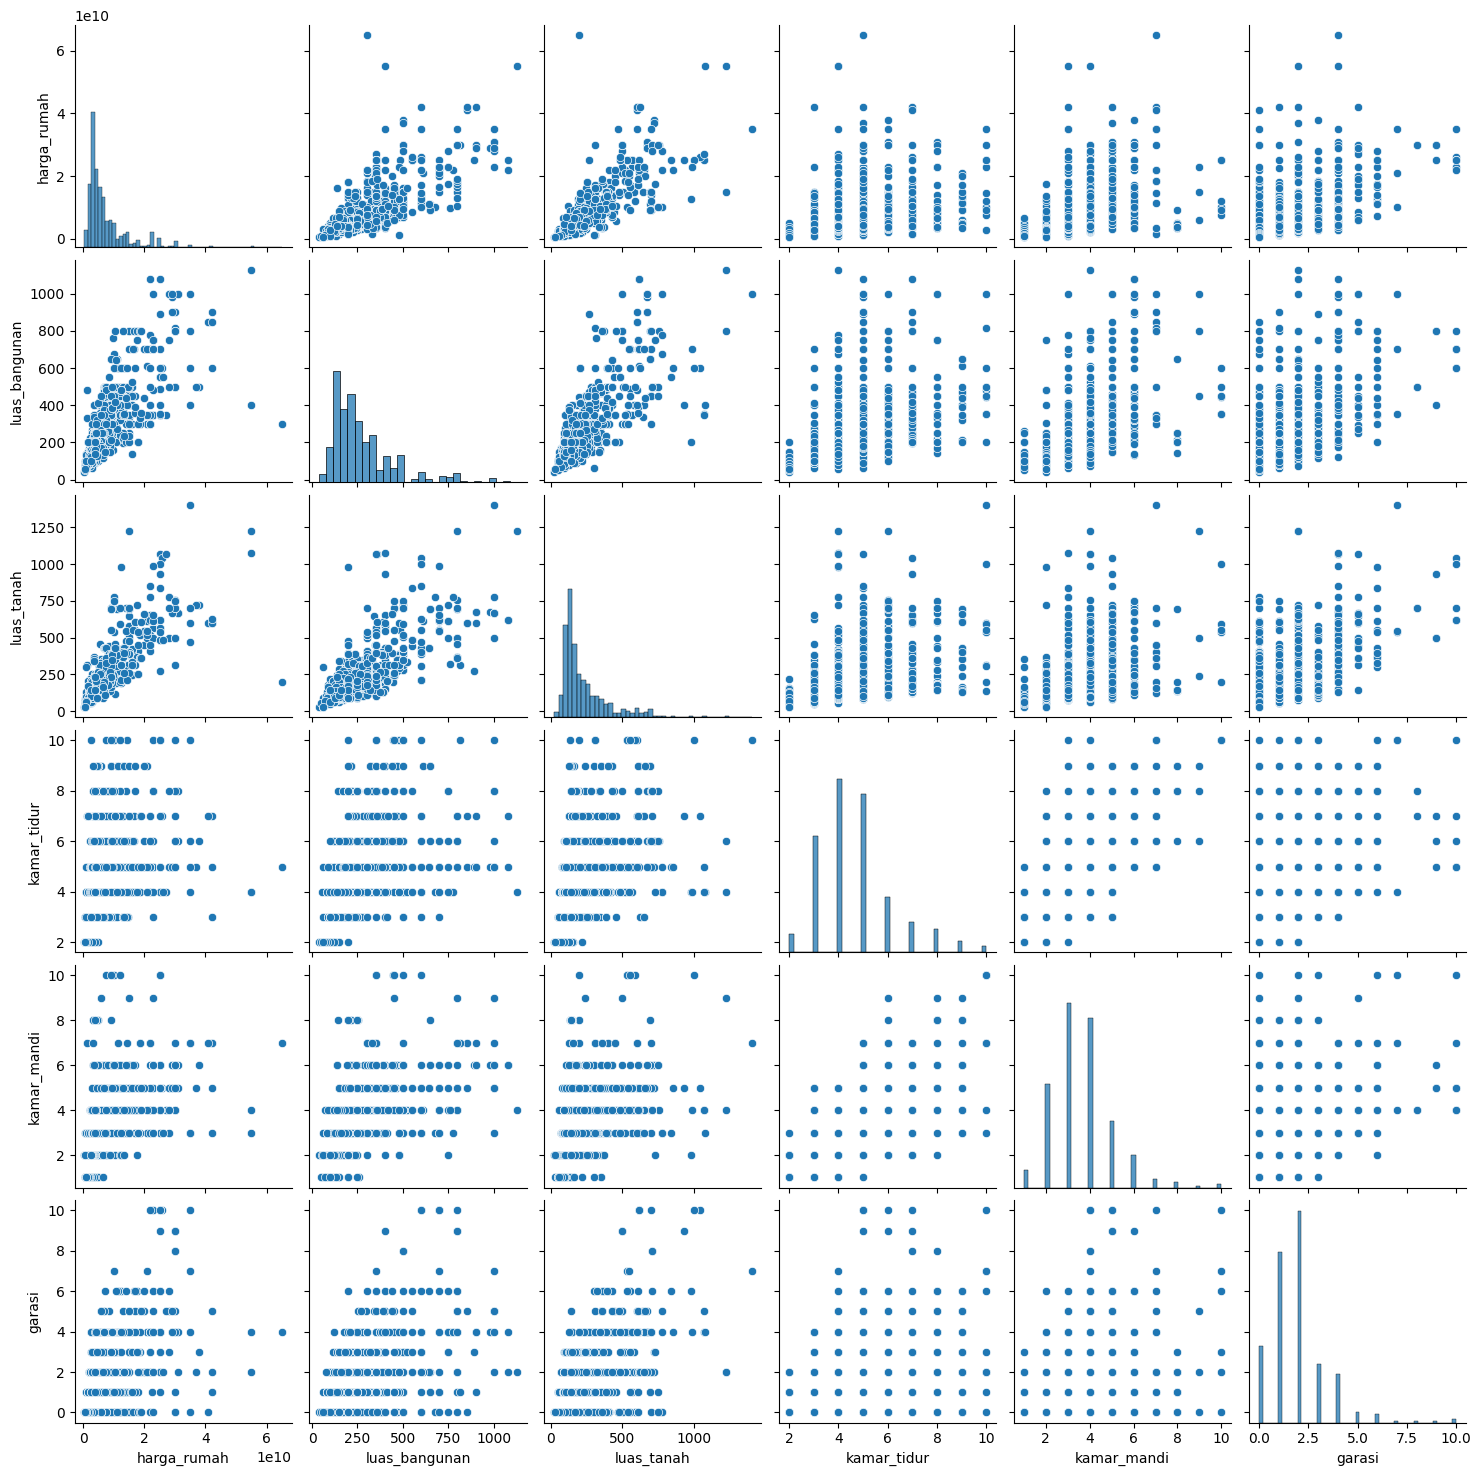

In [18]:
# Visualisasi hubungan antara fitur menggunakan scatter plot
sns.pairplot(df)
plt.show()

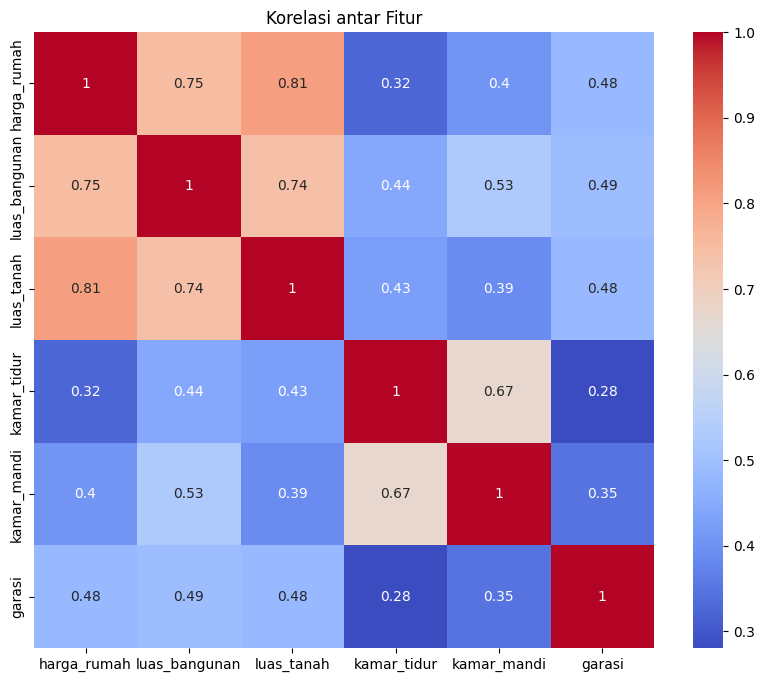

In [19]:
# Visualisasi heatmap untuk korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur')
plt.show()

# Bertujuan untuk memahami hubungan linear antara fitur-fitur dalam dataset.
# Ini membantu dalam mengidentifikasi seberapa kuat fitur-fitur tersebut berkorelasi satu sama lain

# Modeling

Di bagian ini, akan memisahkan data menjadi fitur dan target, membagi data menjadi training dan testing, dan kemudian melatih model regresi linier untuk memprediksi harga rumah.

In [20]:
# Memisahkan fitur dan target
x = df.drop('harga_rumah', axis=1)
y = df['harga_rumah']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Membuat model regresi linier
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Memprediksi pada testing set
y_pred = model.predict(X_test)

# Evaluasi Model

Di bagian ini, akan mengevaluasi kinerja model regresi linier yang telah dilatih dengan menggunakan beberapa metrik evaluasi, yaitu:

- **Mean Squared Error (MSE)**: Untuk mengukur seberapa besar kesalahan rata-rata kuadrat prediksi model
- **R-squared (R²)**: Untuk mengetahui seberapa baik model kita dapat menjelaskan variasi dalam data
- **Mean Absolute Error (MAE)**: Untuk mengetahui kesalahan rata-rata yang lebih mudah dipahami, tanpa memperhatikan arah kesalahan
- **Root Mean Squared Error (RMSE)**: Untuk melihat seberapa besar kesalahan dalam satuan yang sama dengan data asli

Selain itu, juga akan menampilkan plot yang membandingkan nilai yang diprediksi oleh model dengan nilai yang sebenarnya

Mean Squared Error: 1.067572907405743e+19
R-squared: 0.7713134894077546
Mean Absolute Error: 1980345761.1519241
Root Mean Squared Error: 3267373421.275479




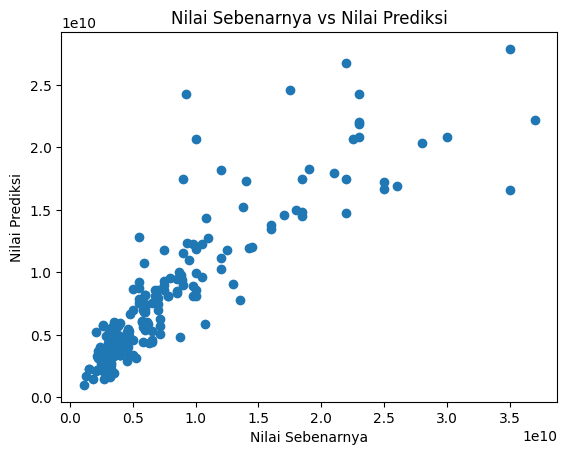

In [21]:
# Menghitung Mean Squared Error (MSE) dan R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Menghitung Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Menampilkan hasil evaluasi
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print("\n")

# Menampilkan plot antara nilai prediksi dan nilai sebenarnya
plt.scatter(y_test, y_pred)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Sebenarnya vs Nilai Prediksi')
plt.show()

# Testing

In [22]:
def predict_house_price(luas_bangunan, luas_tanah, kamar_tidur, kamar_mandi, garasi):
    input_data = pd.DataFrame([[luas_bangunan, luas_tanah, kamar_tidur, kamar_mandi, garasi]], columns=x.columns) 
    predicted_price = model.predict(input_data) # Menampilkan hasil prediksi
    print(f'Prediksi harga rumah adalah Rp {predicted_price[0]:,.0f}')

# Buat slider untuk setiap input dengan format float dan deskripsi sesuai
slider_luas_bangunan = widgets.FloatSlider(value=250, min=50, max=500, step=10, description='Luas Bangunan:', readout_format='.2f')
slider_luas_tanah = widgets.FloatSlider(value=500, min=100, max=1000, step=10, description='Luas Tanah:', readout_format='.2f')
slider_kamar_tidur = widgets.IntSlider(value=2, min=1, max=10, step=1, description='Kamar Tidur:')
slider_kamar_mandi = widgets.IntSlider(value=1, min=1, max=5, step=1, description='Kamar Mandi:')
slider_garasi = widgets.IntSlider(value=1, min=0, max=5, step=1, description='Garasi:')

# Fungsi untuk menampilkan prediksi harga saat nilai slider berubah
def update_prediction(luas_bangunan, luas_tanah, kamar_tidur, kamar_mandi, garasi):
    predict_house_price(luas_bangunan, luas_tanah, kamar_tidur, kamar_mandi, garasi)

# Buat tampilan interaktif dengan menggunakan fungsi update_prediction
widgets.interactive(update_prediction, luas_bangunan=slider_luas_bangunan, luas_tanah=slider_luas_tanah, kamar_tidur=slider_kamar_tidur, kamar_mandi=slider_kamar_mandi, garasi=slider_garasi)


interactive(children=(FloatSlider(value=250.0, description='Luas Bangunan:', max=500.0, min=50.0, step=10.0), …

In [23]:
# Memprediksi pada testing set
y_pred = model.predict(X_test)
# Menghitung koefisien determinasi R2 sebagai "akurasi"
accuracy = model.score(X_test, y_test)
# Menampilkan "akurasi" dalam persentase
print(f'Akurasi Prediksi: {accuracy*100:.2f}%')

Akurasi Prediksi: 77.13%
